# Testbed for TF2 Optimizers

Inspired by machinelearningmastery.com [blog posting](https://machinelearningmastery.com/gradient-descent-optimization-with-nadam-from-scratch/)

Requires TF 2.x

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import tensorflow as tf

## Setup

In [40]:
MAX_ITERATIONS = 1000
LEARNING_RATE = 0.2
INITIAL_POINT = [0.7, 0.8]
OPTIMIZERS = [
    tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE),
    tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    tf.keras.optimizers.RMSprop(learning_rate=LEARNING_RATE),
    tf.keras.optimizers.Adagrad(learning_rate=LEARNING_RATE),
        tf.keras.optimizers.Adadelta(learning_rate=LEARNING_RATE),
]

In [41]:
def loss_function(x):
    return tf.reduce_sum((x * [1, 1])**2, axis=-1)

## Display Loss Surface For Reference

In [140]:
# generate plot points
x = tf.range(-1, 1, 0.1, dtype=tf.float32)
y = tf.range(-1, 1, 0.1, dtype=tf.float32)

t_list = tf.meshgrid(x, y, indexing='ij')
t = tf.stack(t_list, axis=-1)

# generate loss surface
loss_surface = loss_function(t)

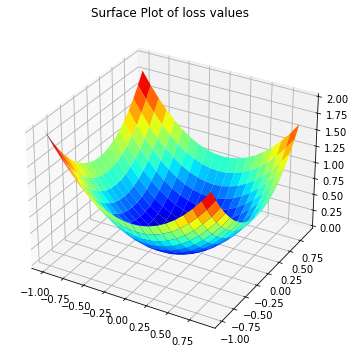

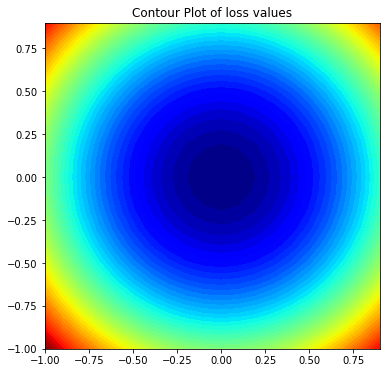

In [141]:

# display surface plot for loss_surface
figure = plt.figure(figsize=(6,6))
axis = figure.gca(projection='3d')
axis.plot_surface(t_list[0], t_list[1], 
                  loss_surface.numpy(), cmap='jet')
# show the plot
plt.title('Surface Plot of loss values')
plt.show()

# display contour plot version
figure = plt.figure(figsize=(6,6))
plt.contourf(t_list[0], t_list[1], loss_surface, levels=50, cmap='jet')
# show the plot
plt.title('Contour Plot of loss values')
plt.show()

## Test out different optimizers on the loss surface

In [ ]:
for optimizer in OPTIMIZERS:

    # setup for looping through optimizers
    x = tf.Variable(INITIAL_POINT, dtype=tf.float32)  # set initial point
    trajectory_points = [x.numpy()]   # record initial starting point
    for _ in range(MAX_ITERATIONS):

        #calculate loss function 
        with tf.GradientTape() as tape:
            loss = loss_function(x)

        # calculate gradient
        var_list = [x]
        grad = tape.gradient(loss, var_list)

        # update solution using the calculated gradient
        optimizer.apply_gradients(zip(grad, var_list))
        trajectory_points.append(x.numpy())
        
        # test if we are approaching a limit point
        if len(trajectory_points) > 10:
            if np.abs(loss_function(trajectory_points[-1]) 
                      - loss_function(trajectory_points[-2])) < 1e-7:
                break

    # consolidate the trajectory the optimizer
    trajectory = np.stack(trajectory_points)

    # create a filled contour plot with 50 levels and jet color scheme
    figure = plt.figure(figsize=(6,6))
    plt.contourf(t_list[0], t_list[1], loss_surface, levels=50, cmap='jet')
    plt.plot(trajectory[:,0], trajectory[:,1], '.-', color='r')
    # show the plot
    plot_title = 'Optimizer: ' + optimizer._name 
    plot_title += '\nend point:' + np.array2string(trajectory[-1], 
                                           formatter={'float': lambda x: "%.4f" % x})
    plot_title += ' with loss_value:' + np.array2string(loss_function(trajectory[-1]).numpy(),
                                                   formatter={'float': lambda x: "%.4f" % x})
    plot_title += '\nnumber of steps: ' + '%d' % len(trajectory)
    plt.title(plot_title)

plt.show()

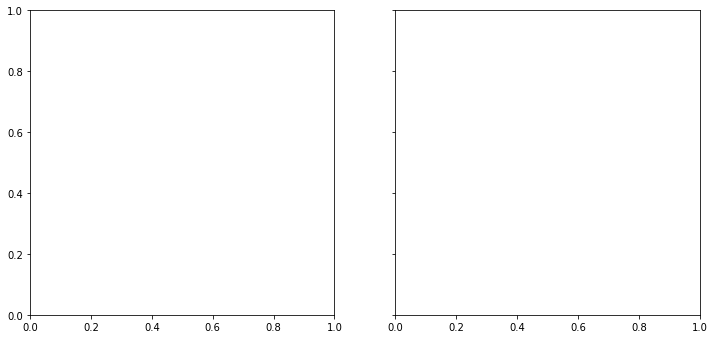

In [130]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(12,12))
ax[0].set_aspect(1)
ax[1].set_aspect(1)

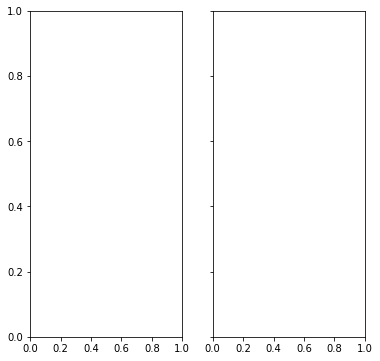

In [117]:
fig

In [118]:
ax[0].figure.get_figwidth(), ax[0].figure.get_figheight()

(6.0, 6.0)

In [119]:
ax[1].figure.get_figwidth(), ax[1].figure.get_figheight()

(6.0, 6.0)

In [120]:
id(ax[0].figure)

139724554528640

In [121]:
id(ax[1].figure)

139724554528640

In [122]:
id(fig)

139724554528640

In [123]:
fig.get_figwidth(), fig.get_figheight()

(6.0, 6.0)

In [124]:
dir(ax[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_box_aspect',
 '_clipon',
 '_clippath',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_axis_map',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',